### Step 1: Importing and Inspecting the Dataframe

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [5]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Missing Data Percentage 
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Step 2: Data Preparation (Data Cleaning and Treatment)

Following things need to be done on dataframe :

1. Check for Duplicates
2. To convert the "Select" into the NaN
3. Dropping columns with more than 70% null values
4. Handling of Missing Value
5. Categorical variables encoding

In [8]:
#check for duplicates
sum(lead_data.duplicated(subset ="Prospect ID")) == 0

True

No duplicate values in Prospect ID

In [9]:
#check for duplicates
sum(lead_data.duplicated(subset ="Lead Number")) == 0

True

No duplicate values in Lead Number

Two columns Prospect ID & Lead Number are just indicative of the ID number of the Contacted People & can be dropped.

In [10]:
#dropping Lead Number and Prospect ID since they have all unique values

lead_data.drop(["Prospect ID", "Lead Number"], 1, inplace = True)

In [11]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

lead_data = lead_data.replace("Select", np.nan)

In [12]:
#checking null values percentage

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#Dropping columns having more than 70% null values

lead_data = lead_data.drop(lead_data.loc[:,list(round(lead_data.isnull().sum()/lead_data.shape[0], 2)>0.70)].columns, 1)

In [14]:
#checking null values percentage

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
# In Lead Quality variable  NaN  replaced to "Not Sure"

lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

Following columns are having too many variations:
1. Asymmetrique Activity Index
2. Asymmetrique Activity Score
3. Asymmetrique Profile Index
4. Asymmetrique Profile Score

and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data

In [16]:
lead_data = lead_data.drop(["Asymmetrique Activity Index","Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Profile Score"],axis=1)

In [17]:
#checking value counts of "City" column

lead_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI

lead_data['City'] = lead_data['City'].replace(np.nan,'Mumbai')

In [19]:
#checking value counts of Tag variable
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
# For Tags column, as most of the values belong to "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [21]:
#checking value counts of What matters most to you in choosing a course variable
lead_data["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# as most of the values belong to "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,"Better Career Prospects") 

In [23]:
# checking value counts of occupation variable
lead_data["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# as most of the values belong to Unemployed hence it is safer to impute NULLS with this value
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [25]:
# checking value counts of Specialization variable
lead_data["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
# Lead may not have mentioned specialization because it may not in the list or since student, don't have a specialization yet.So we will replace NaN values with 'Not Specified'

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Not Specified')

In [27]:
# checking value counts of Country variable
lead_data["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [28]:
#as most of the values belong to "India" and hence it is safer to impute NULLS with this value.
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

As we can see the Number of Values for India are quite high, no particular insights for these columns this column can be dropped.

In [29]:
lead_data=lead_data.drop(["Country"],1)

In [30]:
#checking null values percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [31]:
# Remaining NULL values are less than 2% and hence these rows can be dropped
lead_data.dropna(inplace=True)

lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [32]:
# List of variables to map

var_list =  ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper"
            ,"Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses"
            ,"Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"
           ,"A free copy of Mastering The Interview"]

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the var_list

lead_data[var_list] = lead_data[var_list].apply(binary_map)

In [33]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [34]:
# Checking data imbalance:
lead_data.Converted.value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

Data is balance ,its good to go with further analysis.

### Step 3: Exploratory Data Analysis

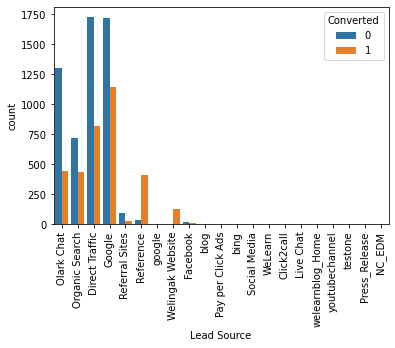

In [35]:
# Analysis of Lead Source with respect ot target variable.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(lead_data["Lead Source"], hue=lead_data["Converted"])
plt.legend(loc='upper right', title="Converted")
plt.xticks(rotation=90)
plt.show(20,30)
                            

In [36]:
# From above grapg it is observed that lead count from some lead source is negligible.Hence they can be club into single gropu as "other_Source".
lead_data["Lead Source"] = lead_data["Lead Source"].replace(["Click2call","Live Chat","NC_EDM","Pay per Click Ads","Press_Release",
  "Social Media", "WeLearn","bing","blog","testone","welearnblog_Home","youtubechannel"], "Other_Source")
# google and Google are the same so replace it with "Google"
lead_data['Lead Source'] = lead_data['Lead Source'].replace("google", 'Google')

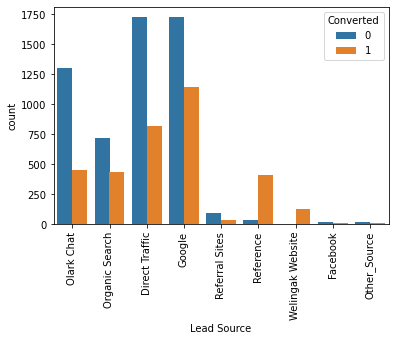

In [37]:
sns.countplot(lead_data["Lead Source"], hue=lead_data["Converted"])
plt.legend(loc='upper right', title="Converted")
plt.xticks(rotation=90)
plt.show(20,30)

### Inferences:
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct  
   traffic, and Google leads and generate more leads from Reference and Welingak Website.

In [156]:
# Analysis of Lead Origin with respect ot target variable.
sns.countplot(lead_data["Lead Origin"], hue=lead_data["Converted"])
plt.legend(loc='upper right', title="Converted")
plt.xticks(rotation=90)
plt.show(20,30)

KeyError: 'Lead Origin'

### Inferences:

1. API and Landing Page Submission has less conversion rate but considerable counts of the leads.
2. conversion rate is very high from the Lead Add Form but count of leads  is low.
3. Lead Import has very less count as well as conversion rate hence can be ignored.
4. To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page 
   Submission' and also increasing the number of leads from 'Lead Add Form'.

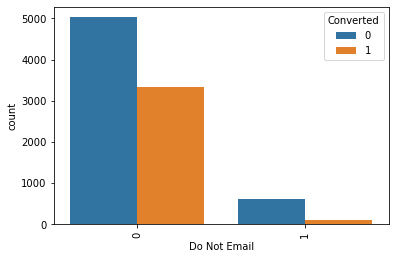

In [39]:
# Analysis of "Do Not Email" variable with respect ot target variable.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(lead_data["Do Not Email"], hue=lead_data["Converted"])
plt.legend(loc='upper right', title="Converted")
plt.xticks(rotation=90)
plt.show(20,30)

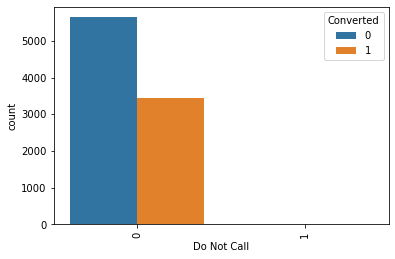

In [40]:
# Analysis of "Do Not Call" variablwite with respect ot target variable.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(lead_data["Do Not Call"], hue=lead_data["Converted"])
plt.legend(loc='upper right', title="Converted")
plt.xticks(rotation=90)
plt.show(20,30)

In [41]:
#checking value counts for Do Not Call

lead_data['Do Not Call'].value_counts(dropna=False)

0    9072
1       2
Name: Do Not Call, dtype: int64

In [42]:
#checking value counts for Do Not Email
lead_data['Do Not Email'].value_counts(dropna=False)

0    8358
1     716
Name: Do Not Email, dtype: int64

In [43]:
# above two columns can be dropped since huge data imbalance in these columns
lead_data = lead_data.drop(["Do Not Call","Do Not Email"],1)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

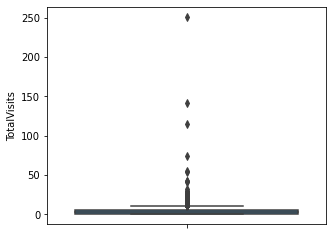

In [44]:
plt.figure(figsize=(5,4))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [45]:
#checking percentile values for "Total Visits"

lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

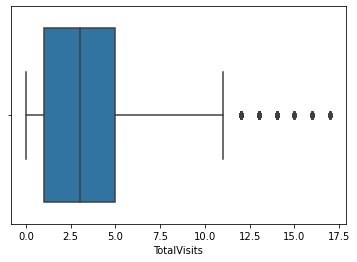

In [46]:
#Outlier Treatment: Removing top 1% of the Column Outlier values
Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
sns.boxplot(lead_data["TotalVisits"])
plt.show()

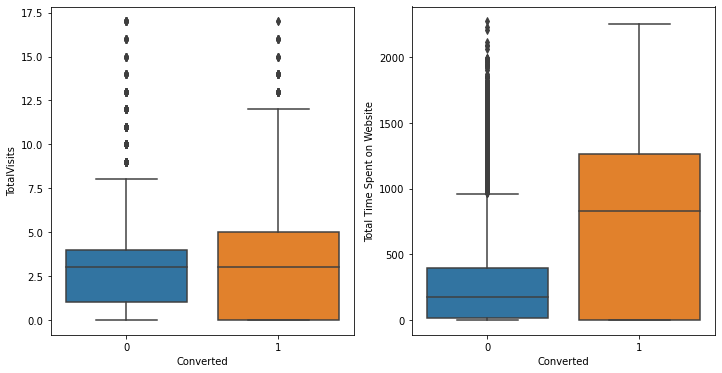

In [47]:
fig=plt.subplots(figsize=(10, 10))

for i,feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_data)
    plt.tight_layout()

### Inferences:

1. The median of both the conversion and non-conversion are same no any observation can be drawn from this information.
2. Users spending more time on the website are more likely to get converted.
3. Websites can be made more compelling so as to increase the time of the Users on websites.

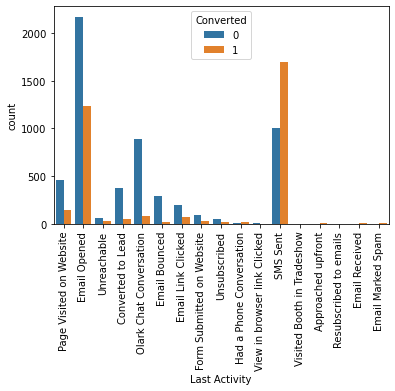

In [48]:
# Last Activity:

sns.countplot(x="Last Activity", hue="Converted", data= lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
# All the low count categories club to the 'Other Activity' category
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')


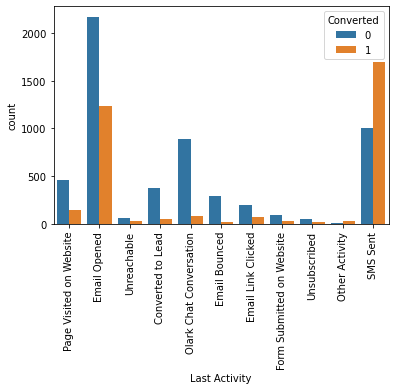

In [50]:
# ploting the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= lead_data)
plt.xticks( rotation='vertical')
plt.show()

### Inferences:

1.The conversion rate of "SMS sent" as last activity is maximum.  
2."Email Opened" activity is having maximun count.  
3.We should focus on increasing the conversion rate of those having last activity as "Email Opened" by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent.

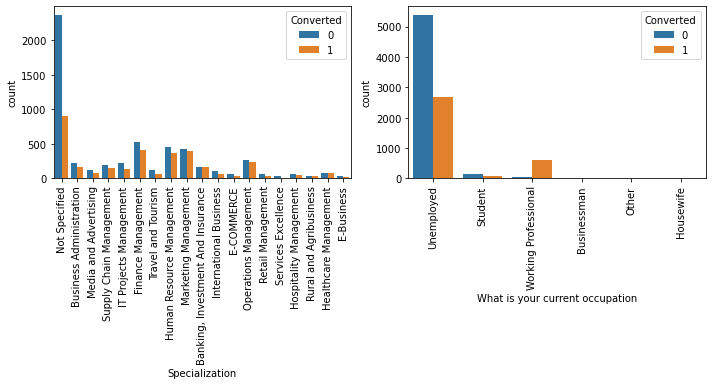

In [51]:
fig=plt.subplots(figsize=(10, 8))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.countplot(x=feature,hue="Converted",  data=lead_data)
    plt.xticks( rotation='vertical')
    plt.legend(loc='upper right', title="Converted")
    plt.tight_layout()

### Inferences:

1. No particular inference can be made for Specialization.
2. high conversion rate observed in Working professionals. 
3. Number of Unemployed leads are more than any other categories.
4. Conversion rate can be increase by increasing the number of Working Professional leads by reaching out to them  
   through social sites and also on increasing the conversion rate of Unemployed leads.

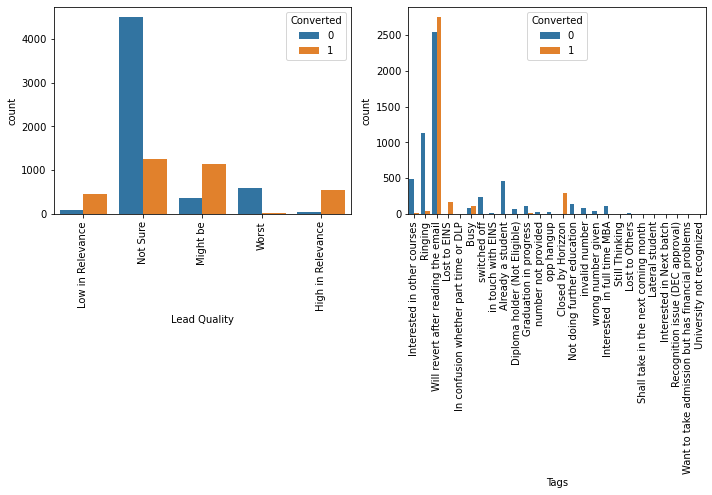

In [52]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_data)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

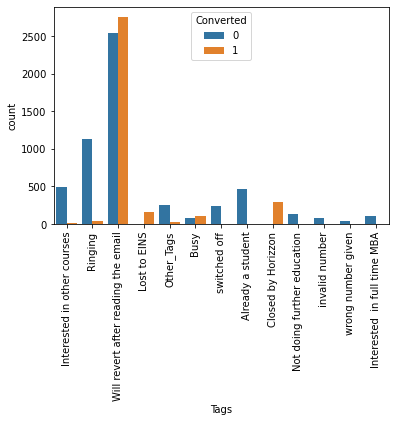

In [53]:
# Converting all low count categories to Other_Tags category
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= lead_data)
plt.xticks( rotation='vertical')
plt.show()

### Inference:

'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate.

In [54]:
lead_data[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,8991.000000,8991.0,8991.000000,8991.0,8991.000000,8991.000000,8991.000000,8991.0,8991.0,8991.0,8991.000000
mean,0.001446,0.0,0.000111,0.0,0.000111,0.000334,0.000667,0.0,0.0,0.0,0.315538
std,0.037999,0.0,0.010546,0.0,0.010546,0.018265,0.025826,0.0,0.0,0.0,0.464756
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


### Inference:

We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

In [55]:
# Dropping unnecessary columns

lead_data = lead_data.drop(["What matters most to you in choosing a course",'Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

lead_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Step 4: Dummy Variable Creation

In [56]:

dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0


In [58]:
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [59]:
lead_data.head(200)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,2.0,457,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

### Step 5: Test-Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0.235294,0.393486,0.25000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
108,0.352941,0.175176,0.18750,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7858,0.647059,0.055458,0.07625,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [66]:
## Checking the Conversion Rate

Conversion_rate = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Conversion_rate

37.80447113780447

#### Conversion rate is 37.80 % 

### Step 7: Looking at Correlations

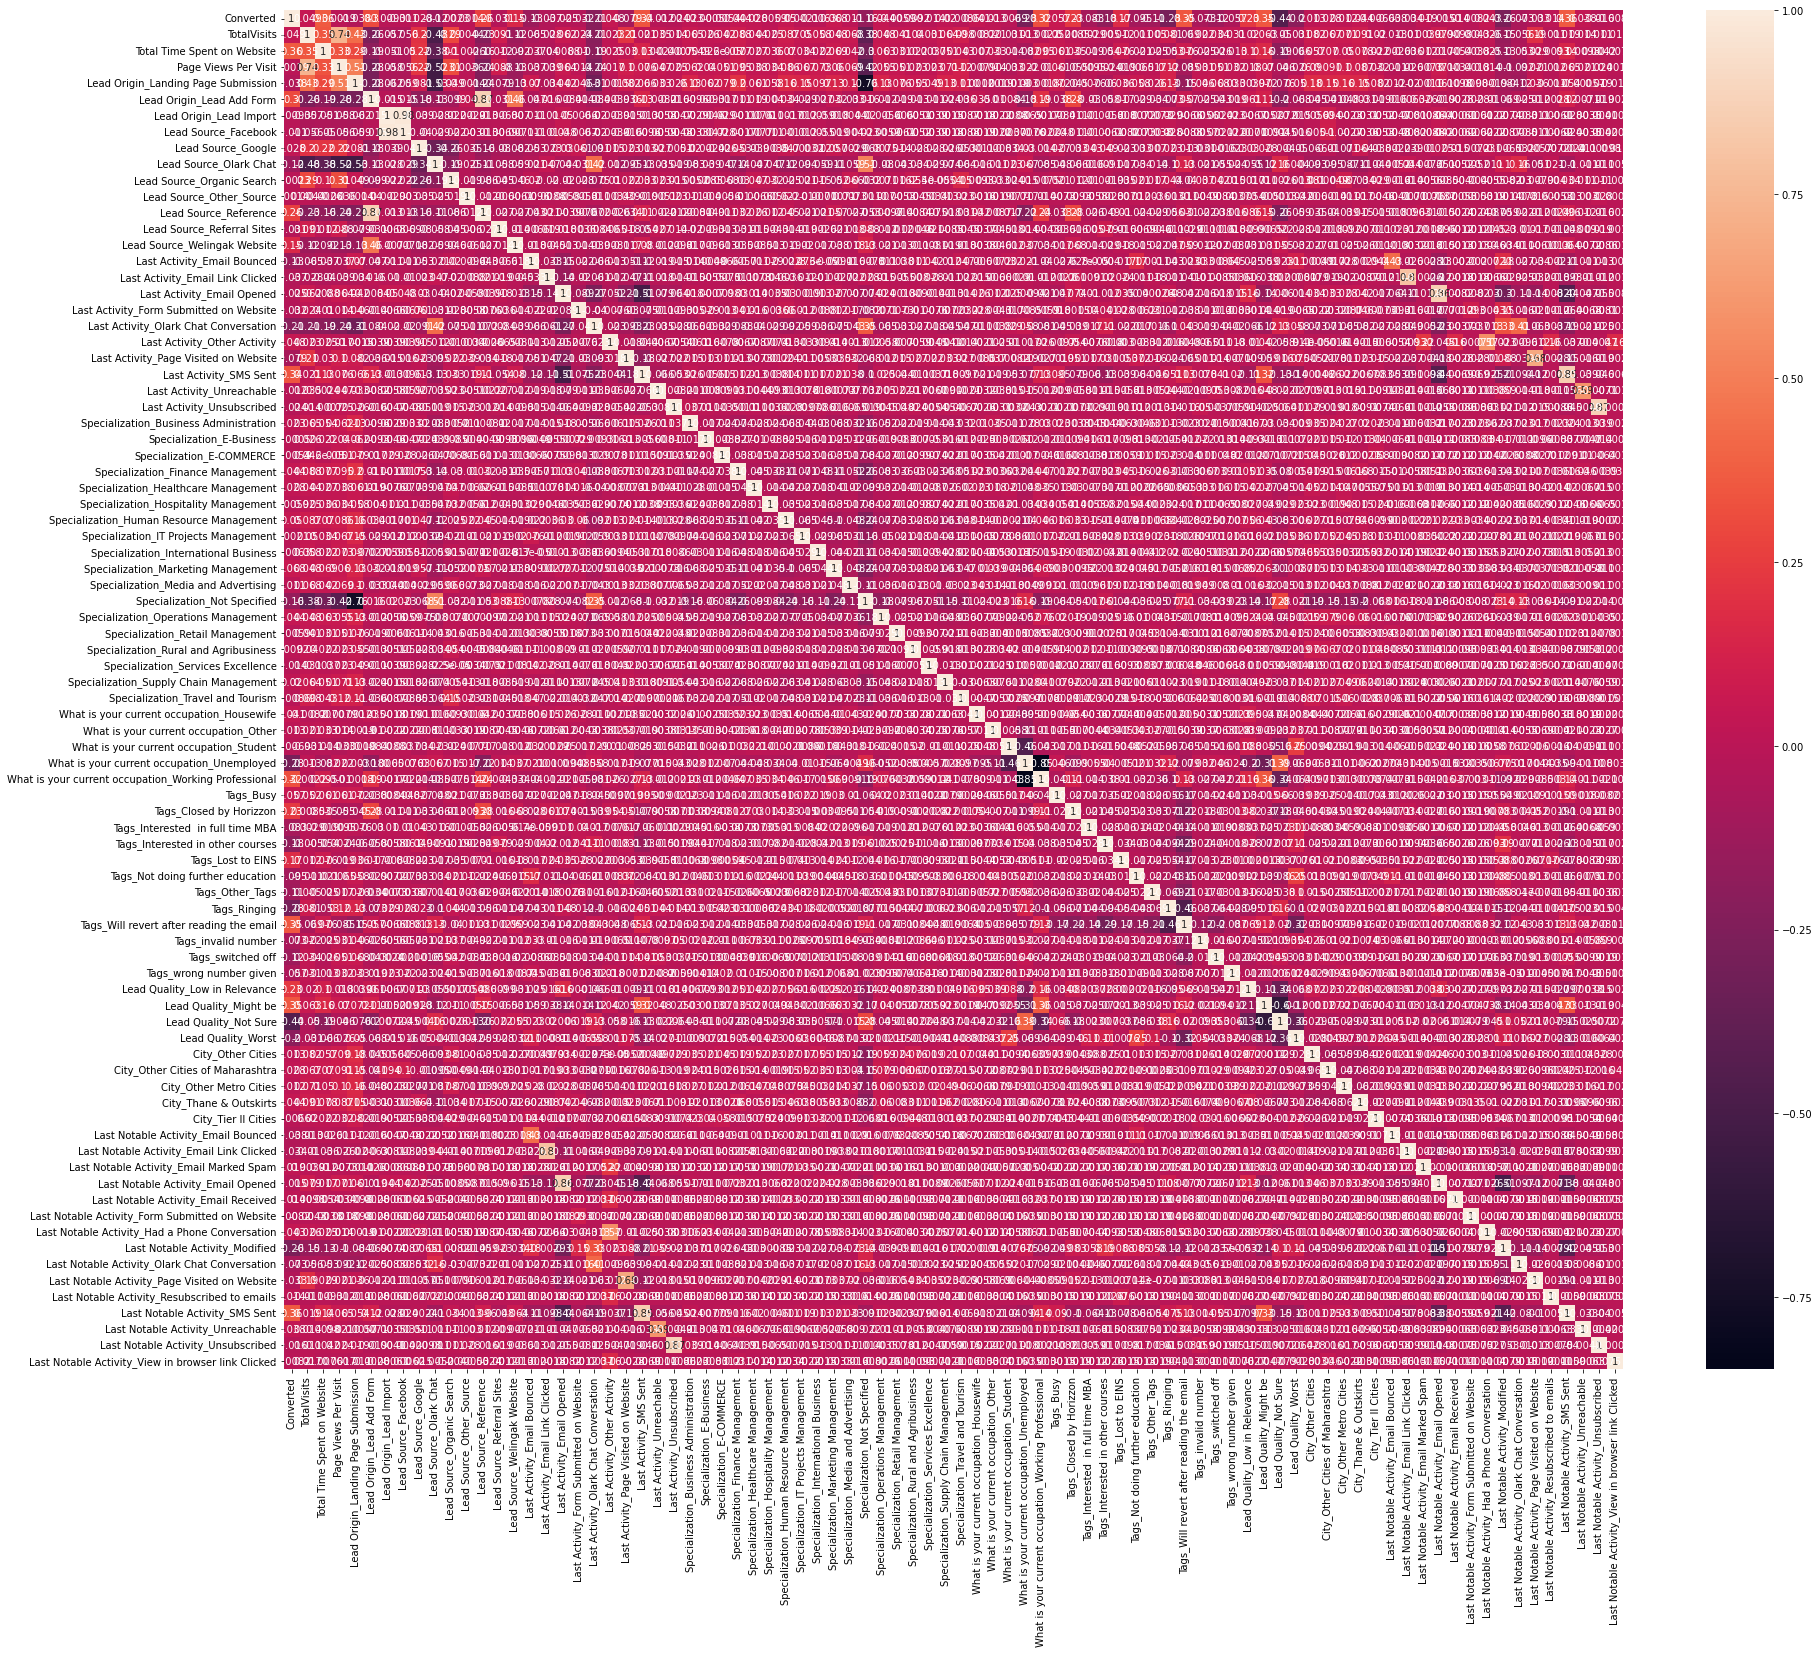

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize =(30,25))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

### Step 8: Model Building

In [68]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           80
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 26 Feb 2023   Deviance:                       64933.
Time:                        10:20:40   Pearson chi2:                 3.18e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -4.451e+14    2.9e+07  -1.54e+07      0.000   -4.45e+14   -4.45e+14
TotalVisits                                           6.978e+14   7.76e+06   8.99e+07      0.000    6.98e+14    6.98e+14
Total Time Spent on Website                           1.387e+15   4.27e+06   3.24e+08      0.000    1.39e+15    1.39e+15
Page Views Per Visit                                 -6.894e+14    1.1e+07  -6.27e+07      0.000   -6.89e+14   -6.89e+14
Lead Origin_Landing Page Submission                  -3.614e+14   3.42e+06  -1.06e+08      0.000   -3.61e+14   -3.61e+14
Lead Origin_Lead Add Form                            -3.762e+12   2.53e+07  -1.49e+05      0.000   -3.76e+12   -3.76e+12
Lead Origin_Lead Import                               1.647e+14   7.77e+06   2.12e+07      0.000    1.65e+14    1.65e+14
Lead Source_Facebook                                  1.647e+14   7.77e+06   2.12e+07      0.000    1.65e+14    1.65e+14
Lead Source_Google                                    6.855e+13   2.47e+06   2.78e+07      0.000    6.86e+13    6.86e+13
Lead Source_Olark Chat                               -2.638e+14   3.87e+06  -6.82e+07      0.000   -2.64e+14   -2.64e+14
Lead Source_Organic Search                            1.043e+14   3.22e+06   3.24e+07      0.000    1.04e+14    1.04e+14
Lead Source_Other_Source                              3.904e+14   1.75e+07   2.23e+07      0.000     3.9e+14     3.9e+14
Lead Source_Reference                                 3.618e+14   2.57e+07   1.41e+07      0.000    3.62e+14    3.62e+14
Lead Source_Referral Sites                            8.958e+13   8.32e+06   1.08e+07      0.000    8.96e+13    8.96e+13
Lead Source_Welingak Website                          9.975e+14   2.64e+07   3.78e+07      0.000    9.98e+14    9.98e+14
Last Activity_Email Bounced                          -3.049e+14   6.46e+06  -4.72e+07      0.000   -3.05e+14   -3.05e+14
Last Activity_Email Link Clicked                      4.778e+14   9.32e+06   5.13e+07      0.000    4.78e+14    4.78e+14
Last Activity_Email Opened                            2.282e+14   5.34e+06   4.27e+07      0.000    2.28e+14    2.28e+14
Last Activity_Form Submitted on Website               6.297e+13   8.67e+06   7.26e+06      0.000     6.3e+13     6.3e+13
Last Activity_Olark Chat Conversation                 3.398e+14   5.25e+06   6.47e+07      0.000     3.4e+14     3.4e+14
Last Activity_Other Activity                          5.202e+14   1.74e+07   2.99e+07      0.000     5.2e+14     5.2e+14
Last Activity_Page Visited on Website                 3.197e+13   6.22e+06   5.14e+06      0.000     3.2e+13     3.2e+13
Last Activity_SMS Sent                                4.83

### Step 9: Feature Selection Using RFE

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Other_Source', False, 49),
 ('Lead Source_Reference', False, 32),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Opened', False, 41),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other Activity', False, 19),
 ('Last Activity_Page Visited on Website', False, 43),
 ('Last Activity_SMS Sent', False, 3),
 ('Last Activity_Unreachable', False, 21),
 ('

In [73]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]

In [74]:
#list of RFE unsupported columns
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Spe

#### Assessing the model with StatsModels

In [75]:
#BUILDING MODEL 1:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1376.4
Date:                Sun, 26 Feb 2023   Deviance:                       2752.8
Time:                        10:20:45   Pearson chi2:                 1.66e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5880
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1533      0.260    -12.132      0.000      -3.663      -2.644
TotalVisits                                              1.5782      0.409      3.860      0.000       0.777       2.380
Total Time Spent on Website                              4.7537      0.249     19.054      0.000       4.265       5.243
Page Views Per Visit                                    -1.8880      0.598     -3.159      0.002      -3.059      -0.717
Lead Origin_Lead Add Form                                2.5031      0.409      6.127      0.000       1.702       3.304
Lead Source_Olark Chat                                   1.0120      0.163      6.203      0.000       0.692       1.332
Lead Source_Welingak Website                             3.7306      1.097      3.401      0.001       1.581       5.880
Last Activity_Email Bounced                             -1.5806      0.409     -3.865      0.000      -2.382      -0.779
What is your current occupation_Working Professional     1.2124      0.306      3.963      0.000       0.613       1.812
Tags_Busy                                                3.5166      0.330     10.666      0.000       2.870       4.163
Tags_Closed by Horizzon                                  7.7408      0.791      9.782      0.000       6.190       9.292
Tags_Lost to EINS                                        8.2417      0.648     12.719      0.000       6.972       9.512
Tags_Ringing                                            -1.5973      0.338     -4.730      0.000      -2.259      -0.935
Tags_Will revert after reading the email                 3.5253      0.237     14.876      0.000       3.061       3.990
Tags_invalid number                                    -23.8463   2.27e+04     -0.001      0.999   -4.44e+04    4.44e+04
Tags_switched off                                       -3.5693      0.806     -4.431      0.000      -5.148      -1.991
Tags_wrong number given                                -22.6107   2.98e+04     -0.001      0.999   -5.84e+04    5.84e+04
Lead Quality_Not Sure                                   -3.1852      0.138    -23.018      0.000      -3.456      -2.914
Lead Quality_Worst                                      -3.8842      0.786     -4.943      0.000      -5.424      -2.344
Last Notable Activity_Olark Chat Conversation           -1.3690      0.407     -3.363      0.001      -2.167      -0.571
Last Notable Activity_SMS Sent                           2.6834      0.131     20.556      0.000       2.428       2.939
========================================================================================================================
"""

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.53
0,TotalVisits,4.99
12,Tags_Will revert after reading the email,4.56
16,Lead Quality_Not Sure,3.30
1,Total Time Spent on Website,2.32
4,Lead Source_Olark Chat,1.94
11,Tags_Ringing,1.84
3,Lead Origin_Lead Add Form,1.81
19,Last Notable Activity_SMS Sent,1.57
9,Tags_Closed by Horizzon,1.34


#### p-value of variable Tags_invalid number is high, so we can drop it.

In [78]:
#dropping column with high p-value

col = col.drop('Tags_invalid number',1)

In [79]:
#BUILDING MODEL 2:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1381.7
Date:                Sun, 26 Feb 2023   Deviance:                       2763.5
Time:                        10:20:45   Pearson chi2:                 1.65e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2793      0.261    -12.568      0.000      -3.791      -2.768
TotalVisits                                              1.5457      0.408      3.793      0.000       0.747       2.344
Total Time Spent on Website                              4.7430      0.248     19.105      0.000       4.256       5.230
Page Views Per Visit                                    -1.8523      0.595     -3.111      0.002      -3.019      -0.685
Lead Origin_Lead Add Form                                2.5223      0.409      6.162      0.000       1.720       3.324
Lead Source_Olark Chat                                   1.0104      0.163      6.203      0.000       0.691       1.330
Lead Source_Welingak Website                             3.7025      1.097      3.375      0.001       1.552       5.853
Last Activity_Email Bounced                             -1.5795      0.409     -3.862      0.000      -2.381      -0.778
What is your current occupation_Working Professional     1.2399      0.308      4.027      0.000       0.636       1.843
Tags_Busy                                                3.6553      0.329     11.119      0.000       3.011       4.300
Tags_Closed by Horizzon                                  7.8611      0.791      9.936      0.000       6.310       9.412
Tags_Lost to EINS                                        8.3928      0.651     12.886      0.000       7.116       9.669
Tags_Ringing                                            -1.4399      0.336     -4.289      0.000      -2.098      -0.782
Tags_Will revert after reading the email                 3.6517      0.237     15.388      0.000       3.187       4.117
Tags_switched off                                       -3.4017      0.804     -4.231      0.000      -4.977      -1.826
Tags_wrong number given                                -21.4320    1.8e+04     -0.001      0.999   -3.54e+04    3.53e+04
Lead Quality_Not Sure                                   -3.1733      0.138    -22.999      0.000      -3.444      -2.903
Lead Quality_Worst                                      -4.1263      0.802     -5.143      0.000      -5.699      -2.554
Last Notable Activity_Olark Chat Conversation           -1.3679      0.407     -3.363      0.001      -2.165      -0.571
Last Notable Activity_SMS Sent                           2.6432      0.129     20.512      0.000       2.391       2.896
========================================================================================================================
"""

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.52
0,TotalVisits,4.99
12,Tags_Will revert after reading the email,4.45
15,Lead Quality_Not Sure,3.27
1,Total Time Spent on Website,2.32
4,Lead Source_Olark Chat,1.94
3,Lead Origin_Lead Add Form,1.81
11,Tags_Ringing,1.81
18,Last Notable Activity_SMS Sent,1.56
5,Lead Source_Welingak Website,1.34


In [82]:
#dropping column with high p-value

col = col.drop("Tags_wrong number given",1)

In [83]:
#BUILDING MODEL 3:

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1383.3
Date:                Sun, 26 Feb 2023   Deviance:                       2766.6
Time:                        10:20:45   Pearson chi2:                 1.65e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5871
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3387      0.260    -12.817      0.000      -3.849      -2.828
TotalVisits                                              1.5215      0.407      3.739      0.000       0.724       2.319
Total Time Spent on Website                              4.7557      0.248     19.153      0.000       4.269       5.242
Page Views Per Visit                                    -1.8290      0.594     -3.078      0.002      -2.994      -0.664
Lead Origin_Lead Add Form                                2.5321      0.410      6.177      0.000       1.729       3.336
Lead Source_Olark Chat                                   1.0144      0.163      6.229      0.000       0.695       1.334
Lead Source_Welingak Website                             3.6951      1.097      3.368      0.001       1.545       5.846
Last Activity_Email Bounced                             -1.5849      0.409     -3.878      0.000      -2.386      -0.784
What is your current occupation_Working Professional     1.2499      0.309      4.047      0.000       0.645       1.855
Tags_Busy                                                3.7187      0.328     11.353      0.000       3.077       4.361
Tags_Closed by Horizzon                                  7.9183      0.791     10.009      0.000       6.368       9.469
Tags_Lost to EINS                                        8.4495      0.651     12.979      0.000       7.174       9.725
Tags_Ringing                                            -1.3741      0.334     -4.111      0.000      -2.029      -0.719
Tags_Will revert after reading the email                 3.7107      0.236     15.697      0.000       3.247       4.174
Tags_switched off                                       -3.3343      0.803     -4.150      0.000      -4.909      -1.760
Lead Quality_Not Sure                                   -3.1736      0.138    -23.016      0.000      -3.444      -2.903
Lead Quality_Worst                                      -4.1151      0.801     -5.137      0.000      -5.685      -2.545
Last Notable Activity_Olark Chat Conversation           -1.3684      0.407     -3.363      0.001      -2.166      -0.571
Last Notable Activity_SMS Sent                           2.6307      0.128     20.502      0.000       2.379       2.882
========================================================================================================================
"""

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.51
0,TotalVisits,4.98
12,Tags_Will revert after reading the email,4.37
14,Lead Quality_Not Sure,3.24
1,Total Time Spent on Website,2.32
4,Lead Source_Olark Chat,1.94
3,Lead Origin_Lead Add Form,1.80
11,Tags_Ringing,1.79
17,Last Notable Activity_SMS Sent,1.56
5,Lead Source_Welingak Website,1.34


In [86]:
#dropping column with high VIF-value

col = col.drop("Page Views Per Visit",1)

In [87]:
#BUILDING MODEL 4:

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1388.1
Date:                Sun, 26 Feb 2023   Deviance:                       2776.3
Time:                        10:20:46   Pearson chi2:                 1.65e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5865
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5124      0.254    -13.807      0.000      -4.011      -3.014
TotalVisits                                              0.8003      0.332      2.413      0.016       0.150       1.450
Total Time Spent on Website                              4.7305      0.247     19.146      0.000       4.246       5.215
Lead Origin_Lead Add Form                                2.7108      0.405      6.687      0.000       1.916       3.505
Lead Source_Olark Chat                                   1.1750      0.154      7.608      0.000       0.872       1.478
Lead Source_Welingak Website                             3.6743      1.097      3.350      0.001       1.525       5.824
Last Activity_Email Bounced                             -1.5742      0.409     -3.848      0.000      -2.376      -0.772
What is your current occupation_Working Professional     1.2399      0.310      4.000      0.000       0.632       1.847
Tags_Busy                                                3.7004      0.328     11.296      0.000       3.058       4.342
Tags_Closed by Horizzon                                  7.8900      0.788     10.010      0.000       6.345       9.435
Tags_Lost to EINS                                        8.4821      0.651     13.033      0.000       7.207       9.758
Tags_Ringing                                            -1.3902      0.334     -4.162      0.000      -2.045      -0.736
Tags_Will revert after reading the email                 3.7043      0.236     15.723      0.000       3.243       4.166
Tags_switched off                                       -3.2978      0.804     -4.101      0.000      -4.874      -1.722
Lead Quality_Not Sure                                   -3.1508      0.137    -22.940      0.000      -3.420      -2.882
Lead Quality_Worst                                      -4.0710      0.796     -5.112      0.000      -5.632      -2.510
Last Notable Activity_Olark Chat Conversation           -1.2952      0.401     -3.229      0.001      -2.081      -0.509
Last Notable Activity_SMS Sent                           2.6026      0.128     20.390      0.000       2.352       2.853
========================================================================================================================
"""

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,4.23
13,Lead Quality_Not Sure,3.18
0,TotalVisits,2.81
1,Total Time Spent on Website,2.30
3,Lead Source_Olark Chat,1.83
2,Lead Origin_Lead Add Form,1.78
10,Tags_Ringing,1.75
16,Last Notable Activity_SMS Sent,1.55
4,Lead Source_Welingak Website,1.33
8,Tags_Closed by Horizzon,1.33


### Inference:
All variables have a good value of VIF i.e less than 5 and p-value less than 0.5.So we need not drop any more variables and we can proceed with model 4 only.

In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.997726
108     0.041371
7858    0.972741
5220    0.693979
3871    0.143827
686     0.931170
1694    0.143827
2180    0.080266
6845    0.143827
191     0.095141
dtype: float64

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99772645, 0.04137054, 0.97274085, 0.69397855, 0.14382676,
       0.93116952, 0.14382676, 0.08026643, 0.14382676, 0.09514132])

In [92]:
#### Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID
0,1,0.997726,1467
1,0,0.041371,108
2,1,0.972741,7858
3,1,0.693979,5220
4,0,0.143827,3871


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,predicted
0,1,0.997726,1467,1
1,0,0.041371,108,0
2,1,0.972741,7858,1
3,1,0.693979,5220,1
4,0,0.143827,3871,0


In [94]:
from sklearn import metrics

In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3711  215]
 [ 291 2076]]


In [96]:
#### Predicted     not_converted    converted
#### Actual
#### not_converted      3711       215
#### converted           291       2076

In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195931987923089


### Metrics beyond simply accuracy

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8770595690747782

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.9452368823229751

In [101]:
# Calculate false postive rate - predicting converted when customer does not converted
print(FP/ float(TN+FP))

0.054763117677024964


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.9061545176778699


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9272863568215892


### Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

Here, our goal is to have achieve good sensitivity score

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

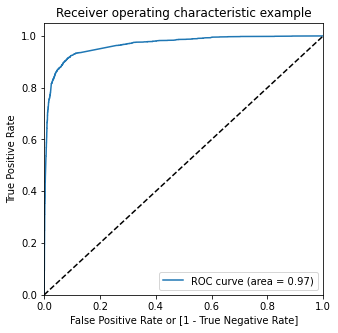

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.997726,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.041371,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.972741,7858,1,1,1,1,1,1,1,1,1,1,1
3,1,0.693979,5220,1,1,1,1,1,1,1,1,0,0,0
4,0,0.143827,3871,0,1,1,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    
    specificity = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensitivity = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_data)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.376132     1.000000     0.000000
0.1   0.1  0.790720     0.975074     0.679572
0.2   0.2  0.907516     0.928602     0.894804
0.3   0.3  0.914031     0.915927     0.912888
0.4   0.4  0.917210     0.899451     0.927916
0.5   0.5  0.919593     0.877060     0.945237
0.6   0.6  0.918799     0.845796     0.962812
0.7   0.7  0.903544     0.780735     0.977585
0.8   0.8  0.888289     0.726658     0.985736
0.9   0.9  0.865247     0.658217     0.990066


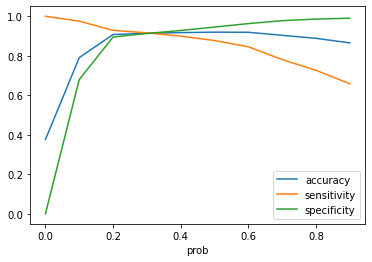

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_data.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.997726,1467,1,1,1,1,1,1,1,1,1,1,1,1,100
1,0,0.041371,108,0,1,0,0,0,0,0,0,0,0,0,0,4
2,1,0.972741,7858,1,1,1,1,1,1,1,1,1,1,1,1,97
3,1,0.693979,5220,1,1,1,1,1,1,1,1,0,0,0,1,69
4,0,0.143827,3871,0,1,1,0,0,0,0,0,0,0,0,0,14


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9140314635309074

In [112]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2

array([[3584,  342],
       [ 199, 2168]], dtype=int64)

In [113]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [114]:
#### Predicted     not_converted    converted
#### Actual
#### not_converted      3584         342
#### converted          199         2168

In [115]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [116]:
# sensitivity of logistic regression model
TP / float(TP+FN)

0.9159273341782848

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.912888436067244

In [118]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.08711156393275599


In [119]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8637450199203187


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9473962463653185


### Precision and Recall

Using sklearn utilities

In [121]:
from sklearn.metrics import precision_score, recall_score

In [122]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9061545176778699

In [123]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8770595690747782

### Precision and recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    0
 6291    0
 6292    1
 Name: predicted, Length: 6293, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

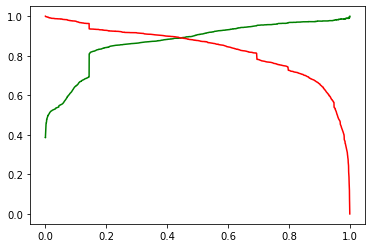

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 12: Making predictions on the test set

In [128]:
#scaling test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [129]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
8692,0.176471,0.133803,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
6126,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5198,0.176471,0.187060,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4979,0.235294,0.378961,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
9225,0.117647,0.032570,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)

In [131]:
y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred[:10]

8692    0.602049
6126    0.995951
5198    0.126443
4979    0.834906
9225    0.000339
3533    0.090432
2726    0.947214
3450    0.090090
7683    0.998507
6286    0.091532
dtype: float64

In [133]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [134]:
# Let's see the head
y_pred_df.head()

,0
8692,0.602049
6126,0.995951
5198,0.126443
4979,0.834906
9225,0.000339


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [136]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [139]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8692,0.602049
1,1,6126,0.995951
2,1,5198,0.126443
3,1,4979,0.834906
4,0,9225,0.000339


In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [141]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Convert_Prob'], axis=1)

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob
0,8692,0,0.602049
1,6126,1,0.995951
2,5198,1,0.126443
3,4979,1,0.834906
4,9225,0,0.000339


In [143]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))

In [144]:
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,final_predicted,Lead_Score
0,8692,0,0.602049,1,60
1,6126,1,0.995951,1,100
2,5198,1,0.126443,0,13
3,4979,1,0.834906,1,83
4,9225,0,0.000339,0,0


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9077094143810229

In [146]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_2

array([[1498,  168],
       [  81,  951]], dtype=int64)

In [147]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9215116279069767

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.8991596638655462

In [150]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8498659517426274

In [151]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9215116279069767

### Final Observation:

### Train Data: 
1. Accuracy : 91.40%
2. Sensitivity : 91.59%
3. Specificity : 91.28%

### Test Data: 
1. Accuracy : 90.77%   
2. Sensitivity : 92.15%   
3. Specificity : 89.91%

### Finding the average Lead Score of the predicted converted leads and predicted  not converted leads

In [152]:
# Creating dataframe for predicted converted leads
y_train_pred_convert = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_convert.head()

,Converted,Convert_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.997726,1467,1,1,1,1,1,1,1,1,1,1,1,1,100
2,1,0.972741,7858,1,1,1,1,1,1,1,1,1,1,1,1,97
3,1,0.693979,5220,1,1,1,1,1,1,1,1,0,0,0,1,69
5,1,0.931170,686,1,1,1,1,1,1,1,1,1,1,1,1,93
17,1,0.588155,4642,1,1,1,1,1,1,1,0,0,0,0,1,59


In [153]:
# Average Lead Score of the predicted converted leads
Converted_leads_avg = round(sum(y_train_pred_convert['Lead_Score'])/len(y_train_pred_convert.index))
Converted_leads_avg

90

We can see that the average Lead Score of the customers, who were converted is 90.

In [154]:
# Creating dataframe for predicted converted leads
y_train_pred_notconvert = y_train_pred_final[y_train_pred_final['predicted']==0]
y_train_pred_notconvert.head()

,Converted,Convert_Prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
1,0,0.041371,108,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0.143827,3871,0,1,1,0,0,0,0,0,0,0,0,0,14
6,0,0.143827,1694,0,1,1,0,0,0,0,0,0,0,0,0,14
7,0,0.080266,2180,0,1,0,0,0,0,0,0,0,0,0,0,8
8,0,0.143827,6845,0,1,1,0,0,0,0,0,0,0,0,0,14


In [155]:
# Average Lead Score of the predicted not converted leads
notconverted_leads_avg = round(sum(y_train_pred_notconvert['Lead_Score'])/len(y_train_pred_notconvert.index))
notconverted_leads_avg

8

We can see that the average Lead Score of the customers, who were not converted is 8.